Cell 1: Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
import matplotlib.pyplot as plt

Cell 2: Loading and Preprocessing Data

In [2]:
# MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # Data Loading
x_train, x_test = x_train/255.0, x_test/255.0  # Normalizing the data


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Cell 3: Plotting an Example

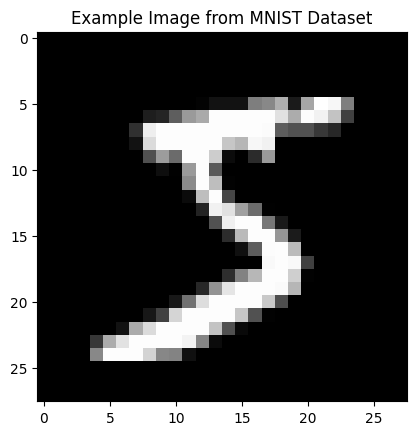

In [3]:
# Plotting an example
plt.imshow(x_train[0], cmap='gray')
plt.title("Example Image from MNIST Dataset")
plt.show()

Cell 4: Preparing the Model

In [4]:

# Preparing the model
model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(120, activation="relu"),
    Dropout(0.2),
    Dense(10)
])

Cell 5: Making Predictions

In [5]:
# Making predictions
predictions = model(x_train[:1]).numpy()
print(predictions)


[[ 0.46307978 -0.25721046  0.0451697  -0.40869555  0.3788136  -0.2717194
   0.08803255  0.23064217  0.293096    0.09546803]]


Cell 6: Applying Softmax

In [6]:
# Applying softmax
print(tf.nn.softmax(predictions).numpy())


[[0.14330858 0.06973553 0.09435744 0.05993285 0.13172732 0.06873105
  0.0984898  0.11358627 0.12090638 0.09922484]]


Cell 7: Defining Loss Function

In [7]:
# Loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


Cell 8: Compiling the Model

In [8]:
# Compiling the model
model.compile(optimizer='SGD',
              loss=loss_fn,
              metrics=['accuracy'])


Cell 9: Training the Model

In [9]:
# Training the model
val = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=300)

Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.3578 - loss: 1.9861 - val_accuracy: 0.7921 - val_loss: 1.1306
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7513 - loss: 1.0691 - val_accuracy: 0.8450 - val_loss: 0.7217
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8051 - loss: 0.7613 - val_accuracy: 0.8665 - val_loss: 0.5708
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8285 - loss: 0.6354 - val_accuracy: 0.8793 - val_loss: 0.4942
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8459 - loss: 0.5615 - val_accuracy: 0.8877 - val_loss: 0.4476


Cell 10: Evaluating the Model

In [10]:
# Evaluating the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")


313/313 - 1s - 3ms/step - accuracy: 0.8877 - loss: 0.4476

Test Accuracy: 0.8877


Cell 11: Validation of Model and Plotting Accuracy

In [13]:

# Cell 9: Plotting Accuracy and Loss
plt.figure(figsize=(12, 5))



<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

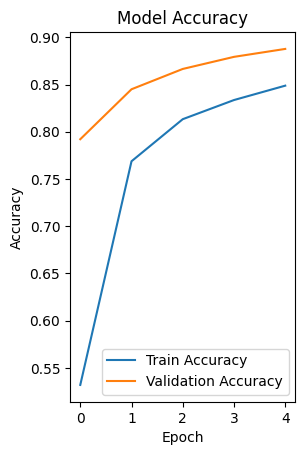

In [14]:
# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(val.history["accuracy"], label="Train Accuracy")
plt.plot(val.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

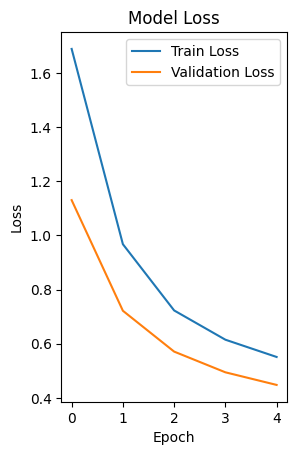

In [15]:
# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(val.history["loss"], label="Train Loss")
plt.plot(val.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()